# Lecture 7
## MINIST Dataset
<hr/>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random 
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

/Users/che/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Use `argmax` instead
[7] [3] [4] [6] [1] [8] [1] [0] [9] [8] 

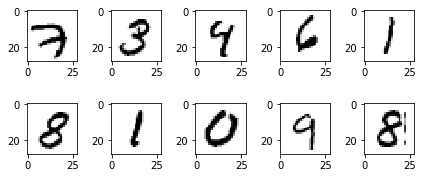

In [2]:
# check train images
sess = tf.Session()
for r in range(0,10):
    plt.subplot(3,5,r+1)
    print(sess.run(tf.arg_max(mnist.train.labels[r:r+1],1)), end=' ')
    plt.imshow(mnist.train.images[r:r+1].reshape(28, 28),
              cmap = 'Greys', interpolation='nearest')
    plt.tight_layout()

In [3]:
nb_classes = 10

#MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])

# 0 ~ 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])


W1 = tf.Variable(tf.random_normal([784, 1000]))
b1 = tf.Variable(tf.random_normal([1000]))
layer1 = tf.nn.softmax(tf.matmul(X, W1) + b1)

'''
W2 = tf.Variable(tf.random_normal([1000, 1000]))
b2 = tf.Variable(tf.random_normal([1000]))
layer2 = tf.nn.softmax(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([1000, 1000]))
b3 = tf.Variable(tf.random_normal([1000]))
layer3 = tf.nn.softmax(tf.matmul(layer2, W3) + b3)

'''

W4 = tf.Variable(tf.random_normal([1000, 1000]))
b4 = tf.Variable(tf.random_normal([1000]))
layer4 = tf.nn.softmax(tf.matmul(layer1, W4) + b4)

W5 = tf.Variable(tf.random_normal([1000, nb_classes]))
b5 = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.nn.softmax(tf.matmul(layer4, W5) + b5)


'''
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

'''


cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=4).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Training epoch / batch

In [ ]:
training_epochs = 10
batch_size = 200

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict= {X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    
    print("Epoch:", '%04d,' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print('Accuracy: {:.2f}% \n' .format(accuracy.eval(session=sess, feed_dict={X:mnist.train.images, Y:mnist.train.labels}) * 100 ,'%'))
    
print("\n\n", sess.run(hypothesis, feed_dict={X: batch_xs, Y: batch_ys}))

Epoch: 0001, cost =  0.204467748
Accuracy: 95.75% 

Epoch: 0002, cost =  0.200979180
Accuracy: 95.80% 

Epoch: 0003, cost =  0.200769464
Accuracy: 96.00% 

Epoch: 0004, cost =  0.196398511


## Test after train

In [17]:
print('----- TEST -----')
print('Accuracy: {:.2f}% \n' 
      .format(accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}) * 100 ,'%'))

----- TEST -----
Accuracy: 93.77% 



## Sample image show and prediction

Label:  [5]
Prediction:  [5]


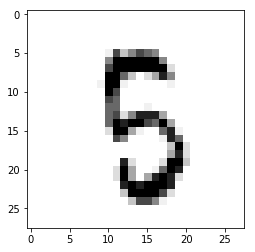

In [18]:
r = random.randint(0, mnist.test.num_examples - 1)
print('Label: ', sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)))
print('Prediction: ', sess.run(tf.arg_max(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
          cmap = 'Greys', interpolation='nearest')
plt.show()

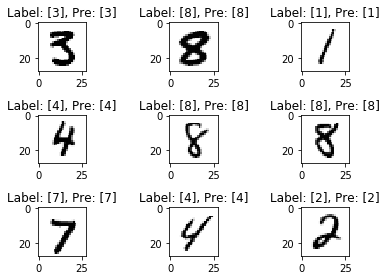

In [10]:
for i in range(9):

    r = random.randint(0, mnist.test.num_examples - 1)
    plt.subplot(3,3,i+1)

    plt.title('Label: {}, Pre: {}'.format(sess.run(tf.arg_max(mnist.test.labels[r:r+1], 1)),
                                                  sess.run(tf.arg_max(hypothesis, 1), 
                                                           feed_dict={X: mnist.test.images[r:r+1]})))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
          cmap = 'Greys', interpolation='nearest')
    plt.tight_layout()

## Using TensorBoard

In [12]:
with tf.name_scope('Layer1') as scope:
    w1_hist = tf.summary.histogram('weights1', W1)
    b1_hist = tf.summary.histogram('biases1', b1)
    layer1_hist = tf.summary.histogram('layer1', layer1)

with tf.name_scope('Layer4') as scope:
    w4_hist = tf.summary.histogram('weights4', W4)
    b4_hist = tf.summary.histogram('biases4', b4)
    layer4_hist = tf.summary.histogram('layer4', layer4)
    
with tf.name_scope('hypothesis') as scope:
    w5_hist = tf.summary.histogram('weights5', W5)
    b5_hist = tf.summary.histogram('biases5', b5)
    hypothesis_hist = tf.summary.histogram('hypothesis', hypothesis)
    
    
cost_summ = tf.summary.scalar('cost', cost)

summary = tf.summary.merge_all()

writer = tf.summary.FileWriter('./logs')
writer.add_graph(sess.graph)

s, _ = sess.run([summary, optimizer], feed_dict = {X:mnist.train.images, Y:mnist.train.labels})
writer.add_summary(s, global_step = 10)